# Flyback Converter Design
![Schematic](resources/schmatic.png)

# Imports and Settings

In [25]:
from resources.FlybackSimulation import FlybackSimulation, Snubber
from matplotlib import pyplot as plt
from numpy import sqrt


# Plot settings
PLOT_FOREGROUND_COLORS = 'white'
PLOT_BACKGROUND_COLOR = '#272822'   # pyplot background color (#272822 matches VS Code's monokai theme)
plt.rcParams['axes.facecolor']      = PLOT_BACKGROUND_COLOR 
plt.rcParams['xtick.color']         = PLOT_FOREGROUND_COLORS
plt.rcParams['ytick.color']         = PLOT_FOREGROUND_COLORS
plt.rcParams['axes.edgecolor']      = PLOT_FOREGROUND_COLORS
plt.rcParams['axes.labelcolor']     = PLOT_FOREGROUND_COLORS
plt.rcParams['legend.labelcolor']   = PLOT_FOREGROUND_COLORS

# Input parameters

In [26]:
Vi = 311        # Input voltage
Vo = 48         # Output voltage
Vdiode = 0.9    # Voltage drop on diode (for calculations only)
Vdsmax = 600    # Maximum Voltage on the switch (disconsidering snubber)
Po = 250        # Output power 
Dmax = 0.5      # Maximum duty cycle (Buck-like if 0<=D<=0.5 and Boost-like if 0.5 <= D <= 1)
Dmin = 0.1
fs = 160e3      # Switching frequency  160kHz
eff = 0.9       # Estimated efficiency (η)  80%
N_perc = 0.8    # Percentage of Nmax assigned to N, that is, N=N_perc*Nmax
ΔImax = 5       # [A] Maximum inductance current ripple

Psnubber_max_relative = 0.05 # maximum ratio Psnubber/Po

# Derived values (do not edit)

## Transformer's winding ratio

The winding ratio might set to limit the induced output voltage on the switch. Assuming a MOSFET with a maximum $V_{DS}$ is used, and considering a voltage drop on the output diode:

### $N_{max}=(V_{DS,max}-V_i)/(V_o+V_{diode})$

In order to give an error margin for the voltage overshoot, the windings ratio might be set to 80% of the maximum theoretical value:

### $N = 80\% \cdot N_{max} $

<!-- ## Critical Inductance
The converter operates in critical conduction mode (limit between CCM and DCM) when $I_m = \frac{\Delta I}{2}$ .
The current ripple and its critical duty cycle are given by:

$\Delta I = \frac{V_i D_{crit}}{L_m f_s}$

$D_{crit} = \frac{N V_o}{V_i + N V_o}$ (same relationship as CCM)

### $\Delta I = \frac{V_i N V_o }{L_m f_s (V_i + N V_o)}$

The average magnetizing current $I_m$ is the sum of the input current and the transformed output current, given by $I_m = I_i + \frac{I_o}{N}$. Knowing that $P_o = \eta P_i$, this yields

### $I_m = P_o \cdot (\frac{1}{\eta V_i} + \frac{1}{V_o N}) $


The critical inductance $L_{crit}$ is the minimal inductance value to achieve CCM, which happens when:

### $I_m = \frac{\Delta I}{2}$

### $L_{m,crit} = \frac{1}{f_s P_o} \cdot \frac{\eta (V_i V_o N)^2}{(\eta V_i+V_o N)\cdot(V_i+V_o N)}$ -->

## Magnetizing inductance
In order to limit the maximum current ripple (due to core losses concerns), the inductance $L_m$ should be chosen at the worst case scenario, which happens when $D=D_{max}$. Thus:

### $L_{m} \ge \frac{D_{max} V_i}{\Delta I_{max} f_s}$

## Critical conduction mode
The converter operates in critical conduction mode (limit between CCM and DCM) when $I_m = \frac{\Delta I}{2}$ .

### $D_{crit} = \frac{1}{V_i} \sqrt{2 P_i L_m f_s} = \sqrt{\frac{2 P_i D_{max}}{V_i \Delta I_{max}}}$


<!-- ## Snubber

A major source of power loss on the RCD snubber in DCM is the induced secondary voltage:

$ P_{snubber} \approx \frac{(1-D)^2 V_o^2 N^2}{R_{snubber}}$

To Achieve a better efficiency, the passive snubber's resistance should have a minimum value set to at least:

$R_{snubber} \ge \frac{(1-D)^2 V_o^2 N^2}{ 5\% P_o} $ -->

## Clamper
$V_{z,max}= V_{DS,max}-V_i$

$V_o N \lt V_z \lt V_{z,max}$
<!-- $V_z = V_{DS,max}-V_i - V_o N$ -->



In [24]:

Nmax=(Vdsmax-Vi)/(Vo+Vdiode); print(f"{Nmax=}")  # N = n1/n2
# D = (Dmax + Dmin)/2 # operating point
Rload = Vo**2/Po; print(f"{Rload=}")
Ts=1/fs
Pi = Po/eff

N = N_perc*Nmax; print(f"{N=}")
# CCM
# Vo_Vi_ccm = 1/Nmax*Dmax/(1-Dmax); print(f"{Vo_Vi_ccm=}")
# Lcrit = ((D**2)*(Vi**2))/(2*Pi*fs); print(f"{Lcrit=}")
# Lcrit = 1/(fs*Po)*(eff*(Vi*Vo*N)**2)/((eff*Vi+Vo*N)*(Vi+Vo*N)); print(f"{Lcrit=:.3}")
Lm_min = (Dmax*Vi)/(ΔImax*fs); print(f"{Lm_min=:.3}")

Dcrit = sqrt(2*Pi*Dmax/(Vi*ΔImax)); print(f"{Dcrit=:.3} (DCM when D<Dcrit)")

Vz_max = Vdsmax - Vi; print(f"{Vz_max=}")
print(f"{Vo*N=}")
Vz = (Vo*N + Vz_max)/2; print(f"{Vz=}")



Nmax=5.91002044989775
Rload=9.216
N=4.7280163599182
Lm_min=0.000194
Dcrit=0.423 (DCM when D<Dcrit)
Vz_max=289
Vo*N=226.94478527607362
Vz=257.9723926380368


# Chosen values

In [4]:
# Choose an N=(n1/n2) <= Nmax


# dD = 0.2
# Lcrit = ((N*Vo/(Vi+Vo*N) - dD)**2 * Vi**2)/(2*Pi); print(f"New {Lcrit=}")

# FIXME: TEST: Lcrit para ΔD = 0
# Lcrit = (N*Vo*Vi/(Vi+N*Vo))**2/(2*fs*Pi); print(f"New {Lcrit=}")

# Choose an Lm <= Lcrit for DCM
Lm = 1.0*Lm_min
D = (Dcrit + Dmin)/2; print(f"D = {100*D:.4}%")

simulation_time = 1000e-6

D = 26.13%


# Final values (do not edit)

The voltage overshoot on the MOSFET must be limited by the Snubber's capacitance. By making the total stored energy on the capacitor equal to that of the discharging inductor, one can write:

$C_{snubber} \ge \frac{L_d \cdot {\Delta I}^2}{20\% f_s}$, where $L_d$ is the stray inductance (usually, $\le 5\% L_m$)

<!-- DCM happens when the average magnetizing current $I_m$ is less than the current ripple $\Delta I = \frac{V_i D}{L_m f_s}$

The input power averaged over a switching period is $ P_i = V_i \cdot I_i$ , where $I_{i, DCM} = \int_0^{D\cdot T_s} {i_i(t)\cdot dt}\approx D\Delta I/2$

The converter will thus operate in **DCM** when
$ D \le D_{DCM} = \frac{1}{V_i} \sqrt{2 L_m P_i} $

In CCM, the demagnetizing current descent of $i_m(t)$ happens at exactly $(1-D)\cdot T_s$ . 
Since the current ripple $\Delta I$ is equal to that of the current's ascent,
equating both case's common terms yields $N V_o (1-D) = V_i D$.

Thus, the converter will operate in **CCM** when $D \ge D_{CCM} = \frac{N V_o}{V_i + N V_o}$

The range between $D_{DCM}$ and $D_{CCM}$ may be given by $\Delta D = D_{CCM} - D_{DCM}$

The upper limit $D_{CCM}$ is fixed by design requirements (input and output voltages, and windings ratio according to $V_{DS, max}$).

However, the magnetizing inductance $L_m$ is free to be selected and will directly impact the lower limit $D_{DCM}$

If this range $\Delta D$ is undesired, one can simply select an $L_m$ which makes $D_{CCM} = D_{DCM}$ . In fact, this value for $L_m$ is given by $(\frac{N V_o V_i}{Vi+V_o N})^2 \cdot \frac{1}{2 P_i}$

<img src="resources/Flyback_D_conduction_mode.png"> -->

In [5]:
# Dccm = N*Vo/(Vi+N*Vo)
# Ddcm = Vo/Vi * sqrt(2*Lm*fs/Rload)
# Ddcm = 1/Vi * sqrt(2*Lm*fs*Pi)

# if Lm < Lcrit:
#     # DCM
#     D = Ddcm
# else:
#     # CCM
#     D = Dccm

# print(f"CCM when D >= {Dccm:.3}")
# print(f"in dcm would be {(1/Vi) * sqrt(2*Lm*fs*Pi)}")
# print(f"DCM when D <= {Ddcm:.3}")
# print(f"{D=}")

if D < Dcrit:
    conduction_mode = "Discontinuous"
else:
    conduction_mode = "Continuous"

print(f"Conduction mode: {conduction_mode}")

ΔI = Vi*D/(Lm*fs); print(f"{ΔI=}")

Ii = Pi/Vi; print(f"{Ii=}")

# Snubber
Rsnubber_min = ((1-D)*Vo*N)**2/(Po*Psnubber_max_relative); print(f"Minimum resistance for the snubber: {int(Rsnubber_min)} Ohms (Assuming a maximum power loss of {100*Psnubber_max_relative:.2} % of {Po}W (Po))")
Csnubber_min = 0.03*Lm * ΔI**2 / (0.1*Vdsmax)
Csnubber = Csnubber_min; print(f"{Csnubber=}")

# Output
Co = 100e-6


Conduction mode: Discontinuous
ΔI=2.6132630389207243
Ii=0.8931761343336906
Minimum resistance for the snubber: 2248 Ohms (Assuming a maximum power loss of 5.0 % of 250W (Po))
Csnubber=6.637074043728858e-07


In [12]:
simulation = FlybackSimulation()
snubber = Snubber(R=Rsnubber_min, C=Csnubber)


simulation.generate_flyback_netlist(_Vin=Vi, _Vout=Vo, _N=N, 
_D=D, _Lm=Lm, _Rl=Rload, _fs=fs, _Co=Co, _snubber=snubber,
_transformer_coupling=1, 
_endtime=simulation_time, _steps_per_switch_period=500)

simulation.begin()
simulation.read_outputs()

Calling Ngspice for generated netlist...

ngspice compiled from ngspice revision 31
Written originally by Berkeley University
Currently maintained by the NGSpice Project

Copyright (C) 1985-1996,  The Regents of the University of California
Copyright (C) 1999-2011,  The NGSpice Project
Available waveforms: ['t', 'Vds', 'Vout', 'Ip', 'Is', 'gate', 'Im']


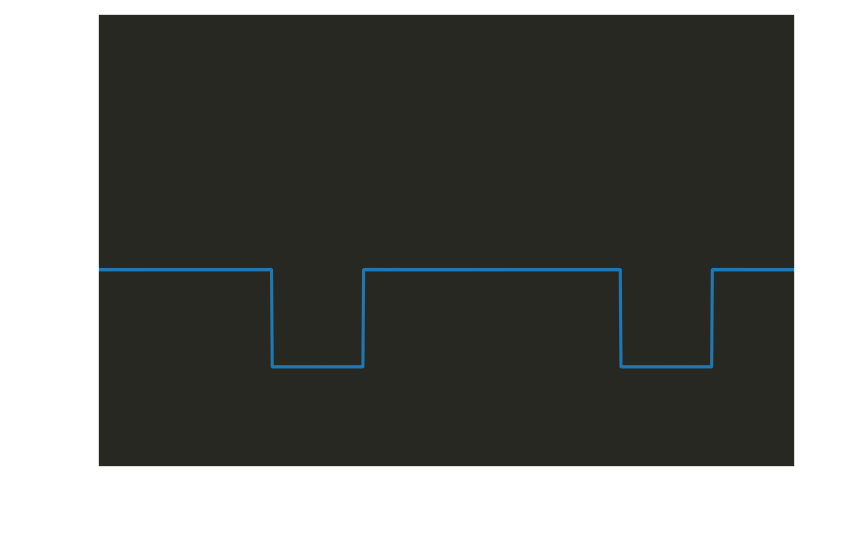

In [13]:
plt.figure(dpi=150)
simulation.plot(); plt.ylim(-5, Vdsmax*1.2)
plt.xlim(simulation_time-2/fs, simulation_time); plt.xlabel("time (s)"); plt.ylabel("Vds (V)");


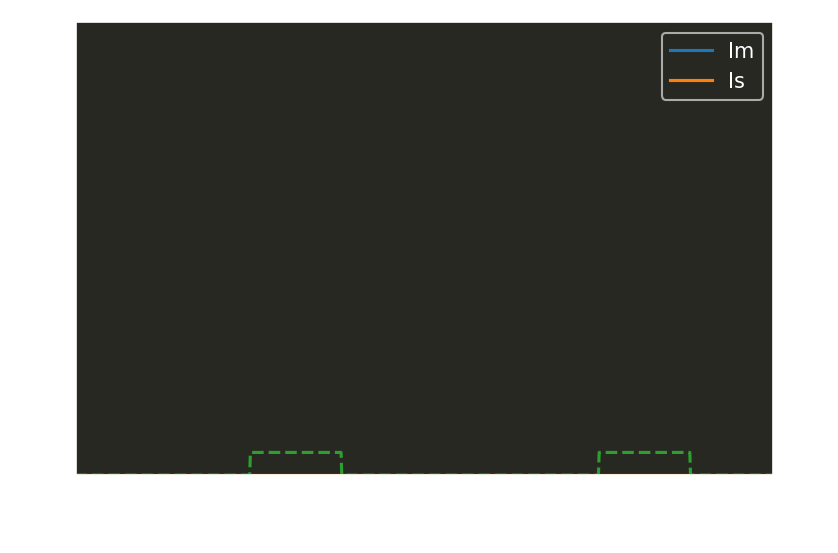

In [14]:
plt.figure(dpi=150)
simulation.plot(y="Im") # 
# plt.plot(simulation.df["t"], 10*simulation.df["Ip"])
simulation.plot(y="Is")
simulation.plot('t','gate','--')
plt.xlim(simulation_time-2/fs, simulation_time); 
plt.ylim(0, 20);
# plt.xlim(simulation_time-10/fs, simulation_time);
plt.legend(["Im", "Is"]); plt.xlabel("time (s)");

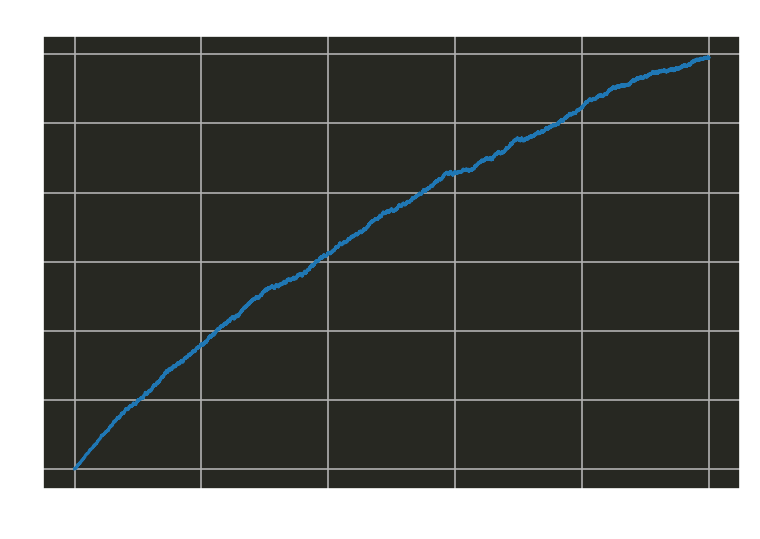

In [15]:
plt.figure(dpi=150);
simulation.plot(y="Vout");
plt.grid(True)
# plt.xlim(simulation_time-2/fs, simulation_time); #plt.ylim(40, 50); plt.xlabel("time (s)");



# References
https://www.monolithicpower.com/en/how-to-design-a-flyback-converter-in-seven-steps